<a href="https://colab.research.google.com/github/miha-tran/Data_Science_Salaries_2024/blob/main/Data_role_salary2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Loading dataset
df = pd.read_csv('salaries_2024.csv')
df.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3627,2024,SE,FT,Machine Learning Engineer,172200,USD,172200,US,0,US,M


In [5]:
# Check for missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# check duplicate column
df.T.duplicated().sum()

0

In [7]:
# check duplicates row
df.duplicated().sum()

5497

In [8]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

# reset the index after dropping duplicates
df = df.reset_index(drop=True)

In [9]:
# check duplicates again
df.duplicated().sum()

0

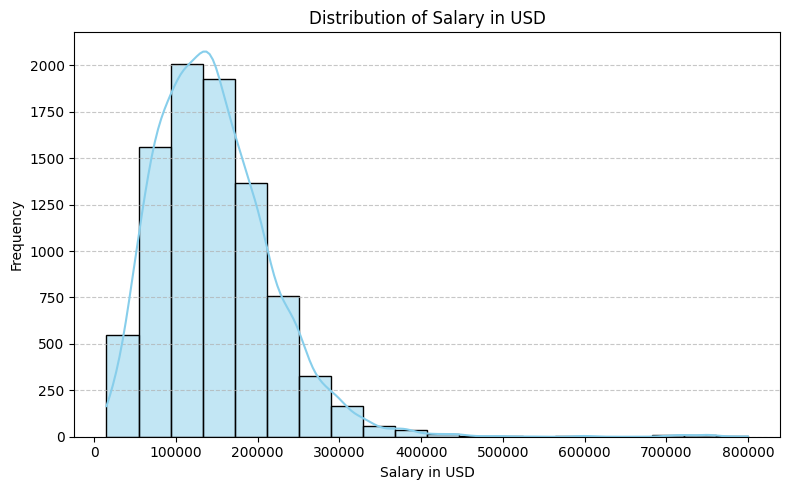

In [10]:
# Plot the histogram of salary
plt.figure(figsize=(8, 5))
sns.histplot(df, x='salary_in_usd', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='salary_in_usd'>

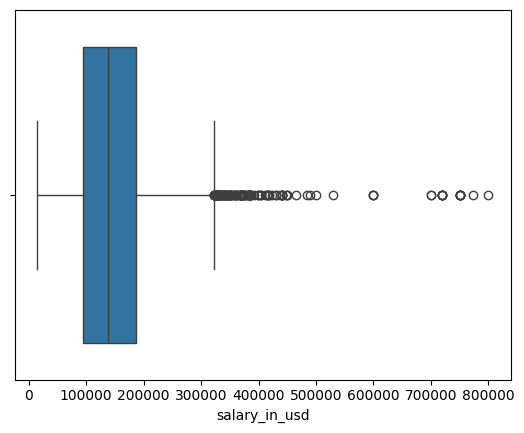

In [11]:
#Exploring the target
sns.boxplot(x=df['salary_in_usd'])

There is 150 unique title job, so I will group **them** to 4 groups fields.

In [12]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Create a new column based on conditions
df_copy['job_title_field'] = 'other'
df_copy.loc[df_copy['job_title'].str.contains(r'\bML\b|data|scientist|research|insight|Computational|Analytics|Applied Scientist', case=False), 'job_title_field'] = 'Data'
df_copy.loc[df_copy['job_title'].str.contains(r'developer|software', case=False, regex=True), 'job_title_field'] = 'software'
df_copy.loc[df_copy['job_title'].str.contains(r'\bML\b|MLOps|deep|learning|AI|Intelligent|Intelligence|Prompt|NLP', case=False, regex=True), 'job_title_field'] = 'ML'

# Print the unique values in the new column
print(df_copy['job_title_field'].head(10))


0    Data
1      ML
2      ML
3    Data
4    Data
5    Data
6    Data
7    Data
8    Data
9    Data
Name: job_title_field, dtype: object


<Axes: xlabel='job_title_field', ylabel='Count'>

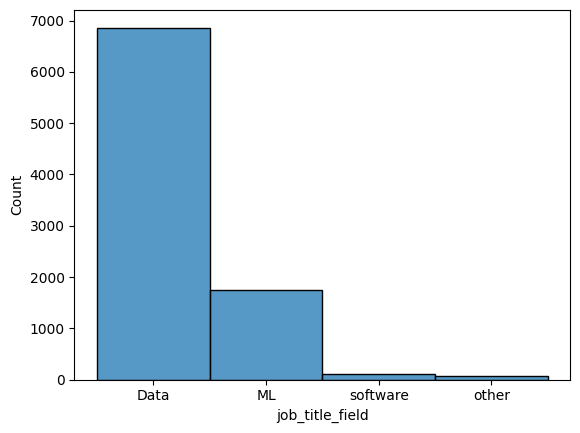

In [13]:
sns.histplot(df_copy['job_title_field'])

**predict how IT salaries increase?**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
df_copy.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title_field'],
      dtype='object')

In [19]:
# drop high correlation coluumns
data = df_copy.drop(columns=['job_title', 'salary', 'salary_currency', 'company_location'])

In [20]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_size',
       'job_title_field'],
      dtype='object')

In [47]:
# Prepare the features (X) and target (y)
X = data[['work_year', 'experience_level', 'employment_type','employee_residence', 'remote_ratio', 'company_size','job_title_field']]
y = data['salary_in_usd']

In [48]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
#Predicting the Test set Results
y_pred = model.predict(X_test)

In [52]:
y_pred

array([165248.4917387 , 166462.27055792, 161043.81838865, ...,
       129400.54979881, 111038.26822348, 143643.3195586 ])

In [53]:
y_test

95      115000
5555    275500
4684    262000
2815     70000
360     180000
         ...  
6179     16000
530      68740
5586    136000
996     120000
5751    119213
Name: salary_in_usd, Length: 1761, dtype: int64

In [54]:
#Testing the model accuracy
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 23.0%


In [55]:
#Getting the final linear regression equation with the values of the coefficients
print(model.coef_)
print(model.intercept_)

[ 4.20467335e+03 -5.41845217e+01  9.20875567e+04  2.79854071e+04
  5.96286757e+04 -1.54711777e+04  8.01967864e+03 -1.54661862e+04
  6.00159207e+04 -3.50754357e+04 -1.27058811e+04  5.97982496e+03
  8.91774081e+03  5.49513464e+04  1.32737557e+04  3.51493902e+04
  3.24045686e-07 -1.71033404e+03 -1.74079141e+04  5.53836796e+04
 -4.51956400e+04  6.31638556e+04  3.06390664e+04  1.30334945e+05
 -1.30927901e+04 -7.58332135e-08 -3.28311418e+04 -6.07874657e+03
  3.34096041e+04  2.66233833e+04  1.09059574e+05 -4.16184776e-09
  5.02041075e-09 -2.80735588e+04  1.58934161e+04 -1.02755788e+04
 -4.05687033e+04  1.36963863e+04  2.50451869e+04 -3.68229157e+04
  1.86577352e+04  1.90661048e+03  1.05731237e+04  1.20508048e-10
 -1.92118425e+03 -1.65398532e+04 -2.04080189e+04  2.12750275e+04
  2.97178634e+05 -1.77767254e+04  6.41327557e+04  7.75475673e+04
 -1.33760979e+04 -1.01863407e-10  4.17752148e+04  3.09569296e+04
 -1.39785207e+04  1.30965339e+04  3.34959102e+04 -8.33370234e+02
  3.33171067e+04 -3.40066

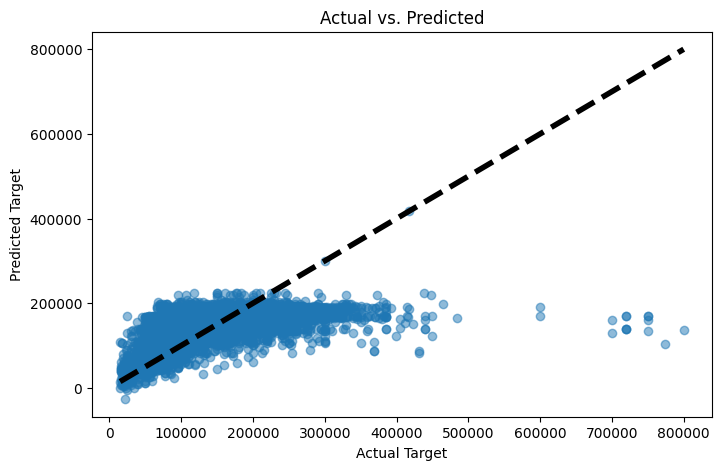

In [56]:
#Visualising the Training set results
y_train_pred = model.predict(X_train)

plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()

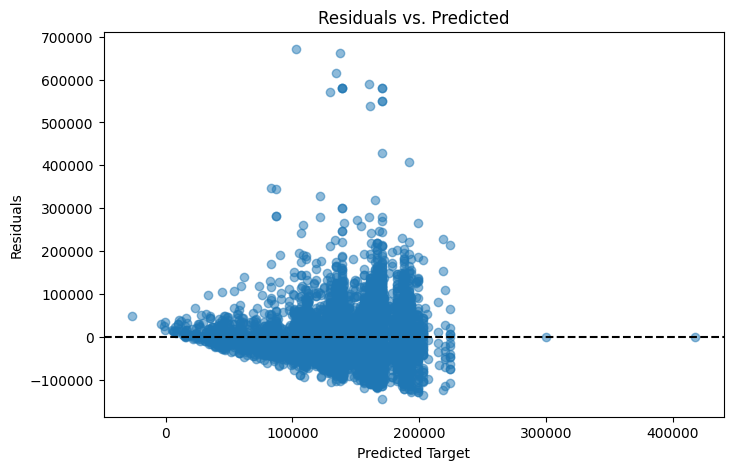

In [57]:
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

No idea what is that! so I need to do it again with only 1 feature to consider if it works.

In [69]:
# Prepare the features (X) and target (y)
X = data[['remote_ratio']]
y = data['salary_in_usd']

In [70]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
#Predicting the Test set Results
y_pred = model.predict(X_test)

In [74]:
y_pred

array([140079.65337403, 150579.33274853, 140079.65337403, ...,
       140079.65337403, 150579.33274853, 140079.65337403])

In [75]:
#Testing the model accuracy
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 0.0%


In [76]:
#Getting the final linear regression equation with the values of the coefficients
print(model.coef_)
print(model.intercept_)

[-104.99679375]
150579.33274853183


In [77]:
print(len(X_train), len(y_train))  # For lists
print(X_train.shape, y_train.shape)  # For NumPy arrays or Pandas Series/DataFrames

7040 7040
(7040, 1) (7040,)


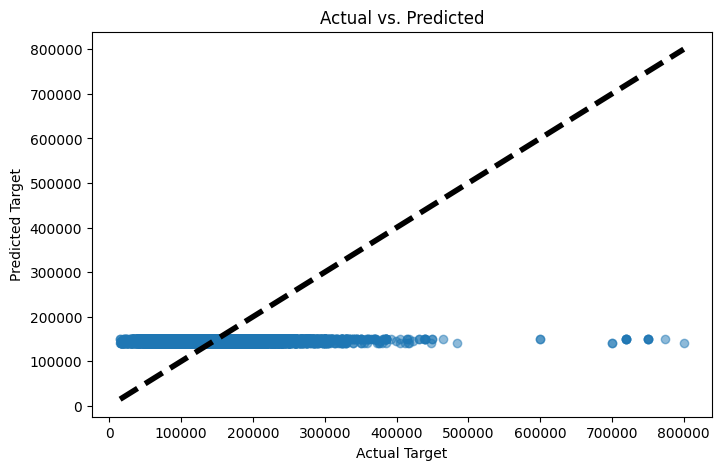

In [78]:
#Visualising the Training set results
y_train_pred = model.predict(X_train)

plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()


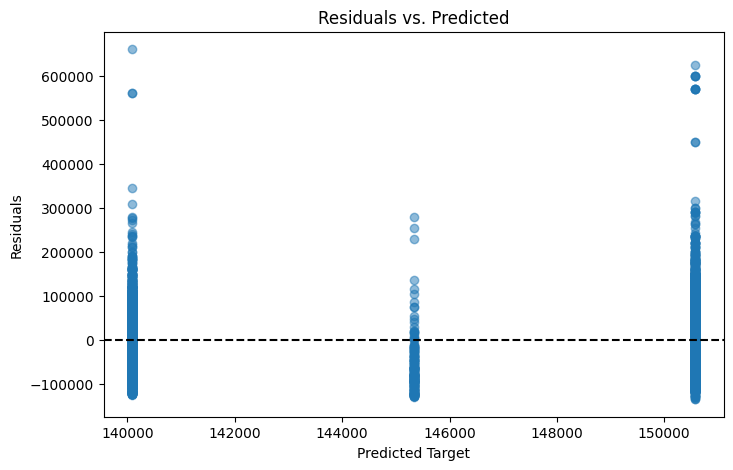

In [79]:
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.axhline(y=0, color='k', linestyle='--')
plt.show()
